In [1]:
'''
什么是词汇分类，在自然语言处理中它们是如何使用？
一个好的存储词汇和它们的分类的Python数据结构是什么？
我们如何自动标注文本中词汇的词类？

'''

'\n什么是词汇分类，在自然语言处理中它们是如何使用？\n一个好的存储词汇和它们的分类的Python数据结构是什么？\n我们如何自动标注文本中词汇的词类？\n\n'

In [2]:
'''
将单词按它们的词性分类并进行相应地标注的过程，称为词语性质标注、词性标注或简称标注。词性也称为词类或词汇类别。用于特定任务的标记的集合被称为一个标记集。
'''

'\n将单词按它们的词性分类并进行相应地标注的过程，称为词语性质标注、词性标注或简称标注。词性也称为词类或词汇类别。用于特定任务的标记的集合被称为一个标记集。\n'

In [3]:
'''
1 使用词性标注器

'''
import nltk
from nltk import *


In [4]:
text = word_tokenize("And now for something completely different")

In [5]:
text

['And', 'now', 'for', 'something', 'completely', 'different']

In [6]:
pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [7]:
'''
NLTK为每个标记提供了文档，可以使用该标记来查询，如nltk.help.upenn_tagset('RB')，或者一个正则表达，如nltk.help.upenn_tagset('NN.*')。一些语料库有标记集文档的README文件，见nltk.corpus.???.readme()，用语料库的名称替换。
'''

"\nNLTK为每个标记提供了文档，可以使用该标记来查询，如nltk.help.upenn_tagset('RB')，或者一个正则表达，如nltk.help.upenn_tagset('NN.*')。一些语料库有标记集文档的README文件，见nltk.corpus.???.readme()，用语料库的名称替换。\n"

In [8]:
nltk.corpus.brown.readme()

'BROWN CORPUS\n\nA Standard Corpus of Present-Day Edited American\nEnglish, for use with Digital Computers.\n\nby W. N. Francis and H. Kucera (1964)\nDepartment of Linguistics, Brown University\nProvidence, Rhode Island, USA\n\nRevised 1971, Revised and Amplified 1979\n\nhttp://www.hit.uib.no/icame/brown/bcm.html\n\nDistributed with the permission of the copyright holder,\nredistribution permitted.\n'

In [9]:
nltk.help.upenn_tagset("NN")

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [10]:
nltk.help.upenn_tagset("RB")

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


In [11]:
"""
同形同音异义词
"""
text = word_tokenize("They refuse to permit us to obtain the refuse permit")

print(pos_tag(text))

'''
请注意refuse和permit都以现在时动词（VBP）和名词（NN）形式出现
'''

[('They', 'PRP'), ('refuse', 'VBP'), ('to', 'TO'), ('permit', 'VB'), ('us', 'PRP'), ('to', 'TO'), ('obtain', 'VB'), ('the', 'DT'), ('refuse', 'NN'), ('permit', 'NN')]


'\n请注意refuse和permit都以现在时动词（VBP）和名词（NN）形式出现\n'

In [12]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar("woman")

man time day year car moment world house family child country boy
state job place way war girl work word


In [13]:
text.similar("over")

in on to of and for with from at by that into as up out down through
is all about


In [14]:
text.similar("the")

a his this their its her an that our any all one these my in your no
some other and


In [15]:
text.similar("buy")

be do have the find make get take see run hear hold say it him provide
let read put use


In [16]:
'''
2 已经标注的语料库

按照NLTK的约定，一个已标注的词符使用一个由词符和标记组成的元组来表示
可以使用函数str2tuple()从表示一个已标注的词符的标准字符串创建一个这样的特殊元组
'''

tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [17]:
sent = '''
... The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
... other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
... Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
... said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
... accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
... interest/NN of/IN both/ABX governments/NNS ''/'' ./.
... '''

In [18]:
#表示已经标注的词符
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

In [19]:
'''
读取已标注的语料库

NLTK中包括的若干语料库已标注了词性
'''
nltk.corpus.brown.tagged_words()[:20]


[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN'),
 ("Atlanta's", 'NP$'),
 ('recent', 'JJ'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', '``'),
 ('no', 'AT'),
 ('evidence', 'NN'),
 ("''", "''"),
 ('that', 'CS')]

In [20]:
#只要语料库包含已标注的文本，NLTK的语料库接口都将有一个tagged_words()方法
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [21]:
'''
只要语料库包含已标注的文本，NLTK的语料库接口都将有一个tagged_words()方法



使用一个内置的到“通用标记集“的映射
'''
nltk.corpus.brown.tagged_words(tagset='universal')
nltk.corpus.treebank.tagged_words(tagset='universal')


[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]

In [22]:
'''
如果语料库也被分割成句子，将有一个tagged_sents()方法将已标注的词划分成句子，而不是将它们表示成一个大列表
'''

'\n如果语料库也被分割成句子，将有一个tagged_sents()方法将已标注的词划分成句子，而不是将它们表示成一个大列表\n'

In [23]:
nltk.corpus.brown.tagged_sents(tagset="universal")[0]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP'),
 ("Atlanta's", 'NOUN'),
 ('recent', 'ADJ'),
 ('primary', 'NOUN'),
 ('election', 'NOUN'),
 ('produced', 'VERB'),
 ('``', '.'),
 ('no', 'DET'),
 ('evidence', 'NOUN'),
 ("''", '.'),
 ('that', 'ADP'),
 ('any', 'DET'),
 ('irregularities', 'NOUN'),
 ('took', 'VERB'),
 ('place', 'NOUN'),
 ('.', '.')]

In [24]:
fdist=nltk.FreqDist(tag for (word,tag) in nltk.corpus.brown.tagged_words(categories="news",tagset="universal"))

In [35]:
fdist.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [33]:
nltk.help.upenn_tagset("N*")

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

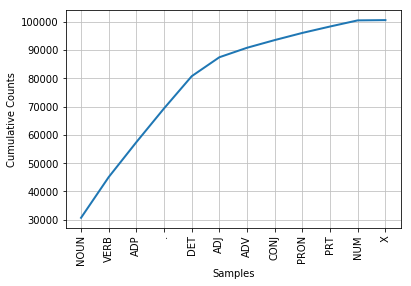

In [42]:
fdist.plot(cumulative=True)

In [56]:
word_tag_pairs = bigrams(nltk.corpus.brown.tagged_words(categories='news',tagset='universal'))

In [57]:
fdist=nltk.FreqDist(a[1] for a,b in word_tag_pairs if b[1]=='NOUN')

In [58]:
fdist.most_common()

[('NOUN', 7959),
 ('DET', 7373),
 ('ADJ', 4761),
 ('ADP', 3781),
 ('.', 2796),
 ('VERB', 1842),
 ('CONJ', 938),
 ('NUM', 894),
 ('ADV', 186),
 ('PRT', 94),
 ('PRON', 19),
 ('X', 11)]

In [59]:
[tag for tag,_ in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

In [60]:
cfd=nltk.ConditionalFreqDist(nltk.corpus.brown.tagged_words(tagset='universal'))

In [61]:
cfd.conditions()

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.',
 'jury',
 'further',
 'in',
 'term-end',
 'presentments',
 'the',
 'City',
 'Executive',
 'Committee',
 ',',
 'which',
 'had',
 'over-all',
 'charge',
 'deserves',
 'praise',
 'and',
 'thanks',
 'Atlanta',
 'for',
 'manner',
 'was',
 'conducted',
 'September-October',
 'term',
 'been',
 'charged',
 'by',
 'Superior',
 'Court',
 'Judge',
 'Durwood',
 'Pye',
 'to',
 'investigate',
 'reports',
 'possible',
 'hard-fought',
 'won',
 'Mayor-nominate',
 'Ivan',
 'Allen',
 'Jr.',
 'Only',
 'a',
 'relative',
 'handful',
 'such',
 'received',
 'considering',
 'widespread',
 'interest',
 'number',
 'voters',
 'size',
 'this',
 'city',
 'it',
 'did',
 'find',
 'many',
 "Georgia's",
 'registration',
 'laws',
 'are',
 'outmoded',
 'or',
 'inadeq

In [63]:
cfd.N()

1161192

In [65]:
cfd['the']

FreqDist({'DET': 62710, 'X': 3})

In [66]:
cfd['cut']

FreqDist({'NOUN': 19, 'VERB': 161})

In [68]:
cfd['yield'].most_common()

[('NOUN', 19), ('VERB', 16)]

In [69]:
def findtags(tag_prefix,tagged_text):
    cfd=nltk.ConditionalFreqDist((tag,word) for word,tag in nltk.corpus.brown.tagged_words(categories="news") if tag.startswith(tag_prefix))
    return dict((tag,cfd[tag].most_common(5)) for tag in cfd.conditions())

In [70]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))

In [71]:
tagdict

{'NN': [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)],
 'NN$': [("year's", 13),
  ("world's", 8),
  ("state's", 7),
  ("nation's", 6),
  ("city's", 6)],
 'NN$-HL': [("Golf's", 1), ("Navy's", 1)],
 'NN$-TL': [("President's", 11),
  ("Administration's", 3),
  ("Army's", 3),
  ("League's", 3),
  ("University's", 3)],
 'NN-HL': [('sp.', 2),
  ('problem', 2),
  ('Question', 2),
  ('cut', 2),
  ('party', 2)],
 'NN-NC': [('ova', 1), ('eva', 1), ('aya', 1)],
 'NN-TL': [('President', 88),
  ('House', 68),
  ('State', 59),
  ('University', 42),
  ('City', 41)],
 'NN-TL-HL': [('Fort', 2),
  ('Mayor', 1),
  ('Commissioner', 1),
  ('City', 1),
  ('Oak', 1)],
 'NNS': [('years', 101),
  ('members', 69),
  ('people', 52),
  ('sales', 51),
  ('men', 46)],
 'NNS$': [("children's", 7),
  ("women's", 5),
  ("men's", 3),
  ("janitors'", 3),
  ("taxpayers'", 2)],
 'NNS$-HL': [("Dealers'", 1), ("Idols'", 1)],
 'NNS$-TL': [("Women's", 4),
  ("States'", 3),
  ("Giants'", 2),
  ("Prince

In [73]:
from nltk.corpus import *
brown_learned_text = brown.words(categories='learned')

In [74]:
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

In [77]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
cfd=FreqDist(tags)
cfd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [78]:
'''
找出涉及特定标记和词序列的词
'''
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence): 
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')): 
            print(w1, w2, w3) 

In [79]:
for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

collected to buy
continue to provide
wish to congratulate
help to turn
try to keep
try to frighten
wish to advocate
expect to see
refuse to aid
needs to stand
strives to emulate
refusing to show
seems to match
decided to rake
entitled to stay
bringing to bear
beginning to get
threaten to use
begin to play
begin to hunt
induced to see
going to hang
continue to test
choose to agree
chosen to find
compelled to conduct
need to realize
used to justify
fail to respond
intends to economize
bound to say
trying to mollify
used to say
came to reassert
choose to call
intend to re-enter
conscripted to enact
continues to feed
tried to integrate
poised to strike
try to force
attempting to reach
afford to take
forbidden to sit
plans to import
likes to imagine
used to get
trying to make
ceased to suggest
going to work
wanting to cut
choose to persuade
trying to keep
like to embark
suited to defeat
hastened to put
like to add
want to preserve
required to participate
happened to save
doing to promote
te

happened to light
began to turn
intended to warn
used to transform
forced to overcome
begins to give
failed to post
refused to permit
encouraged to beget
obliged to obey
united to push
try to oppose
made to impose
wanted to clarify
proposed to sail
determined to catch
forced to turn
seemed to sense
seemed to know
tried to brush
turning to repeat
tried to persuade
wanted to turn
preparing to pacify
forced to retreat
contracted to supply
forced to leave
offering to bring
attempt to bring
decided to cast
liked to tease
going to buy
com to sea
drilled to follow
born to command
come to recognize
allowed to account
created to fan
come to mean
trying to make
refusing to keep
wishes to discuss
want to ask
want to tap
said to use
employed to see
shoot to kill
refused to touch
threatened to shoot
said to let
begin to roll
held to assure
going to make
managed to get
wanted to play
prepared to counterattack
failed to rally
tried to rape
refused to speak
called to look
refused to say
mean to sugges

tends to weaken
seems to rise
permitted to see
continues to discuss
serve to sublimate
wanted to close
wished to keep
want to describe
began to denounce
afford to place
try to fit
decides to enter
expected to prefer
tend to bring
tend to become
tend to assimilate
tend to converge
disposed to question
forced to realize
assembled to bear
beginning to tell
hastened to dispatch
ordered to attack
going to trouble
wanted to borrow
trying to pick
helping to prevent
preferred to sell
think to take
ordered to approach
prepared to move
come to pay
refused to grant
want to offend
seeming to invalidate
want to drive
left to resist
tempted to consider
empowered to swear
allowed to appoint
wanted to invest
decided to stay
live to see
began to put
decided to leave
wanted to leave
want to see
come to say
began to move
went to visit
got to drink
seem to know
wanted to help
seem to fall
tends to obscure
beginning to point
trying to prove
trying to sort
Start to prepare
obliged to go
declined to introduc

presumed to realize
assembled to legislate
sought to find
tend to view
wished to minimize
designed to deal
ordered to retain
refused to permit
refuse to exercise
prepared to read
wants to displace
authorized to fashion
choose to assert
used to impose
chooses to enforce
heard to object
goes to prove
intended to obstruct
entitled to sue
entitled to sue
appear to permit
applied to eliminate
entitled to sue
entitled to sue
elected to file
elect to continue
intended to ease
permitted to survive
furnished to probe
want to make
designed to minimize
designed to elicit
continued to arrive
coded to permit
wishing to sell
endeavored to maintain
directed to provide
seeking to continue
refused to assume
concerned to leave
attempt to settle
continue to make
seems to increase
exists to show
learning to control
want to explore
struggling to meet
trying to learn
continues to increase
like to tease
begins to decline
begins to substitute
learned to cooperate
begins to participate
helping to make
failing 

promised to take
meant to shout
longed to increase
want to begin
seemed to imply
stopped to admire
stayed to visit
want to get
tried to remember
began to riffle
promise to make
like to travel
tried to repair
used to play
beginning to thin
fail to let
lean to reach
trying to get
want to see
beginning to see
bother to wipe
fit to shake
going to wake
care to get
tried to stop
expected to hear
got to expect
going to put
got to thaw
want to touch
made to fall
come to rest
trying to attain
stopped to gaze
begun to turn
beginning to cook
began to develop
begun to buy
want to thin
planned to graduate
going to tell
trying to get
want to roast
preferred to sit
liked to sit
seemed to come
plan to conduct
required to detect
obliged to prepare
began to rise
attempting to hide
begun to protest
come to clean
rose to put
managed to persuade
offered to prevail
want to hear
fumbling to untie
want to leave
going to work
want to keep
like to think
began to wrap
going to put
agreed to correspond
lived to s

seek to storm
used to defend
shocked to find
hesitate to speak
beginning to study
grow to devote
wish to turn
going to fail
wished to change
wanted to take
wanted to bring
like to know
intend to marry
began to talk
used to play
trying to get
happen to drive
hating to get
try to walk
left to believe
tried to rest
dying to defend
used to kid
wanted to paint
going to organize
try to paint
used to hang
prepared to worship
want to stir
beginning to gather
tried to believe
used to say
began to shudder
come to understand
come to see
called to say
decided to cremate
want to meet
impelled to kneel
trying to touch
trying to flatter
trying to worry
trying to worry
want to go
like to take
wanted to know
trying to get
gone to purify
waiting to see
come to skirt
trying to make
go to sleep
tried to emulate
began to pulse
amazed to find
kneeling to tie
trying to get
trying to smile
seemed to float
tried to see
stop to analyze
supposed to joke
supposed to handle
want to ask
got to admit
tried to leave


In [82]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                for (word, tag) in brown_news_tagged)

for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


In [85]:
nltk.app.concordance()


**********************************************************************
  Resource sinica_treebank not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('sinica_treebank')
  
  Searched in:
    - 'C:\\Users\\admin/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'E:\\Anaconda3\\nltk_data'
    - 'E:\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\admin\\AppData\\Roaming\\nltk_data'
**********************************************************************



In [87]:
pos = {}
pos['colorless'] = 'ADJ'
pos['ideas'] = 'N' 
pos['sleep'] = 'V' 
pos['furiously'] = 'ADV'

In [88]:
pos

{'colorless': 'ADJ', 'furiously': 'ADV', 'ideas': 'N', 'sleep': 'V'}

In [89]:
list(pos)

['colorless', 'ideas', 'sleep', 'furiously']

In [90]:
sorted(pos)

['colorless', 'furiously', 'ideas', 'sleep']

In [91]:
for x,y in pos.items():
    print(x,y)

colorless ADJ
ideas N
sleep V
furiously ADV


In [92]:
list(pos.keys())

['colorless', 'ideas', 'sleep', 'furiously']

In [93]:
list(pos.values())

['ADJ', 'N', 'V', 'ADV']

In [94]:
list(pos.items())

[('colorless', 'ADJ'), ('ideas', 'N'), ('sleep', 'V'), ('furiously', 'ADV')]

In [100]:
from collections import defaultdict
'''
指定字典项的默认值为一个特定的数据类型的默认值
'''


'\n指定字典项的默认值为一个特定的数据类型的默认值\n'

In [97]:
frequency = defaultdict(int)

In [98]:
frequency['colorless'] = 4

In [99]:
frequency['ideas']#不存在的键

0

In [101]:
pos = defaultdict(lambda: 'NOUN')
pos['colorless'] = 'ADJ'
pos['adadasda']

'NOUN'

In [102]:
from operator import itemgetter

In [105]:
pair = ('NP', 8336)
fun=itemgetter(1)#返回一个函数

In [106]:
fun(pair)

8336

In [109]:
counts = defaultdict(int)
for (word, tag) in brown.tagged_words(categories='news', tagset='universal'):
    counts[tag] += 1
sorted(counts.items(), key=itemgetter(1), reverse=True)

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [113]:
'''

默认标注器
defaulttagger
'''

raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [115]:
default_tagger.evaluate(brown.tagged_sents())

0.13130472824476916

In [ ]:
'''
正则表达式标注器基于匹配模式分配标记给词符

'''

In [116]:
patterns = [
...     (r'.*ing$', 'VBG'),               # gerunds
...     (r'.*ed$', 'VBD'),                # simple past
...     (r'.*es$', 'VBZ'),                # 3rd singular present
...     (r'.*ould$', 'MD'),               # modals
...     (r'.*\'s$', 'NN$'),               # possessive nouns
...     (r'.*s$', 'NNS'),                 # plural nouns
...     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
...     (r'.*', 'NN')                     # nouns (default)
... ]

In [117]:
regexp_tagger = nltk.RegexpTagger(patterns)

In [121]:
regexp_tagger.tag(brown.sents()[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [124]:
regexp_tagger.evaluate(brown.tagged_sents())

0.19537768086586887

In [125]:
'''
查询标注器
'''

'\n查询标注器\n'

In [126]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)

In [127]:
likely_tags

{"''": "''",
 '(': '(',
 ')': ')',
 ',': ',',
 '--': '--',
 '.': '.',
 ':': ':',
 ';': '.',
 '?': '.',
 'A': 'AT',
 'But': 'CC',
 'He': 'PPS',
 'I': 'PPSS',
 'In': 'IN',
 'It': 'PPS',
 'Mr.': 'NP',
 'Mrs.': 'NP',
 'New': 'JJ-TL',
 'President': 'NN-TL',
 'The': 'AT',
 '``': '``',
 'a': 'AT',
 'about': 'IN',
 'after': 'IN',
 'against': 'IN',
 'all': 'ABN',
 'also': 'RB',
 'an': 'AT',
 'and': 'CC',
 'any': 'DTI',
 'are': 'BER',
 'as': 'CS',
 'at': 'IN',
 'be': 'BE',
 'been': 'BEN',
 'before': 'IN',
 'but': 'CC',
 'by': 'IN',
 'can': 'MD',
 'could': 'MD',
 'first': 'OD',
 'for': 'IN',
 'from': 'IN',
 'had': 'HVD',
 'has': 'HVZ',
 'have': 'HV',
 'he': 'PPS',
 'her': 'PP$',
 'him': 'PPO',
 'his': 'PP$',
 'home': 'NN',
 'in': 'IN',
 'into': 'IN',
 'is': 'BEZ',
 'it': 'PPS',
 'its': 'PP$',
 'last': 'AP',
 'made': 'VBN',
 'more': 'AP',
 'new': 'JJ',
 'no': 'AT',
 'not': '*',
 'of': 'IN',
 'on': 'IN',
 'one': 'CD',
 'only': 'AP',
 'or': 'CC',
 'other': 'AP',
 'out': 'RP',
 'over': 'IN',
 'said':

In [134]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,backoff=nltk.DefaultTagger('NN'))
'''
许多词都被分配了一个None标签，因为它们不在100个最频繁的词之中。在这些情况下，我们想分配默认标记NN。换句话说，我们要先使用查找表，如果它不能指定一个标记就使用默认标注器，这个过程叫做回退
 backoff=nltk.DefaultTagger('NN')
'''

"\n许多词都被分配了一个None标签，因为它们不在100个最频繁的词之中。在这些情况下，我们想分配默认标记NN。换句话说，我们要先使用查找表，如果它不能指定一个标记就使用默认标注器，这个过程叫做回退\n backoff=nltk.DefaultTagger('NN')\n"

In [133]:
baseline_tagger.evaluate(brown.tagged_sents())

0.5980888604124038

In [136]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

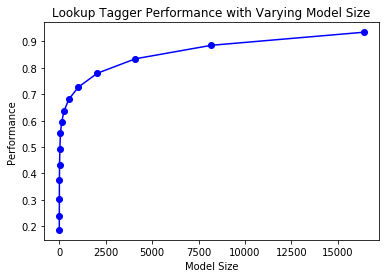

In [137]:
display()  

In [140]:
'''

 一元标注
 
 一元标注器基于一个简单的统计算法：对每个标识符分配这个独特的标识符最有可能的标记。
 一元标注器的行为就像一个查找标注器（4），除了有一个更方便的建立它的技术，称为训练。
'''
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

In [143]:
'''

分离训练和测试数据


'''
size = int(len(brown_tagged_sents) * 0.9)

train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]

unigram_tagger = nltk.UnigramTagger(train_sents)

unigram_tagger.evaluate(test_sents)

0.8121200039868434

In [144]:
'''
一般的N-gram标注


'''

'\n一般的N-gram标注\n\n'

In [145]:
'''
一元
在基于一元处理一个语言处理任务时，我们使用上下文中的一个项目。标注的时候，我们只考虑当前的词符，与更大的上下文隔离。给定一个模型，我们能做的最好的是为每个词标注其先验的最可能的标记。这意味着我们将使用相同的标记标注一个词，如wind，不论它出现的上下文是the wind还是to wind。

'''

'\n一元\n在基于一元处理一个语言处理任务时，我们使用上下文中的一个项目。标注的时候，我们只考虑当前的词符，与更大的上下文隔离。给定一个模型，我们能做的最好的是为每个词标注其先验的最可能的标记。这意味着我们将使用相同的标记标注一个词，如wind，不论它出现的上下文是the wind还是to wind。\n\n'

In [148]:
'''
一个n-gram tagger标注器是一个一元标注器的一般化，它的上下文是当前词和它前面n-1个标识符的词性标记

我们让n=3；也就是说，我们考虑当前词的前两个词的标记。一个n-gram标注器挑选在给定的上下文中最有可能的标记。

1-gram标注器是一元标注器另一个名称：即用于标注一个词符的上下文的只是词符本身。2-gram标注器也称为二元标注器，3-gram标注器也称为三元标注器。
'''

'\n一个n-gram tagger标注器是一个一元标注器的一般化，它的上下文是当前词和它前面n-1个标识符的词性标记\n\n我们让n=3；也就是说，我们考虑当前词的前两个词的标记。一个n-gram标注器挑选在给定的上下文中最有可能的标记。\n\n1-gram标注器是一元标注器另一个名称：即用于标注一个词符的上下文的只是词符本身。2-gram标注器也称为二元标注器，3-gram标注器也称为三元标注器。\n'

In [149]:
'''
NgramTagger类使用一个已标注的训练语料库来确定对每个上下文哪个词性标记最有可能

'''

'\nNgramTagger类使用一个已标注的训练语料库来确定对每个上下文哪个词性标记最有可能\n\n'

In [150]:
#已标注训练
bigram_tagger = nltk.BigramTagger(train_sents)

#标注
bigram_tagger.tag(brown_sents[2007])

unseen_sent = brown_sents[4203]

#测试
bigram_tagger.tag(unseen_sent)

#评分
bigram_tagger.evaluate(test_sents)


0.10206319146815508

In [152]:
'''
当n越大，上下文的特异性就会增加，我们要标注的数据中包含训练数据中不存在的上下文的几率也增大。这被称为数据稀疏问题，在NLP中是相当普遍的。因此，我们的研究结果的精度和覆盖范围之间需要有一个权衡（这与信息检索中的精度/召回权衡有关）。

小心！

N-gram标注器不应考虑跨越句子边界的上下文。因此，NLTK的标注器被设计用于句子列表，其中一个句子是一个词列表。在一个句子的开始，tn-1和前面的标记被设置为None。

'''

'\n当n越大，上下文的特异性就会增加，我们要标注的数据中包含训练数据中不存在的上下文的几率也增大。这被称为数据稀疏问题，在NLP中是相当普遍的。因此，我们的研究结果的精度和覆盖范围之间需要有一个权衡（这与信息检索中的精度/召回权衡有关）。\n\n小心！\n\nN-gram标注器不应考虑跨越句子边界的上下文。因此，NLTK的标注器被设计用于句子列表，其中一个句子是一个词列表。在一个句子的开始，tn-1和前面的标记被设置为None。\n\n'

In [153]:
'''
 组合标注器
解决精度和覆盖范围之间的权衡的一个办法是尽可能的使用更精确的算法，但却在很多时候落后于具有更广覆盖范围的算法
'''

'\n 组合标注器\n解决精度和覆盖范围之间的权衡的一个办法是尽可能的使用更精确的算法，但却在很多时候落后于具有更广覆盖范围的算法\n'

In [154]:
'''
 标注生词
'''

'\n 标注生词\n'

In [155]:
'''
 存储标注器
 
 在大语料库上训练一个标注器可能需要大量的时间。没有必要在每次我们需要的时候训练一个标注器，很容易将一个训练好的标注器保存到一个文件以后重复使用。让我们保存我们的标注器t2到文件t2.pkl
'''

'\n 存储标注器\n \n 在大语料库上训练一个标注器可能需要大量的时间。没有必要在每次我们需要的时候训练一个标注器，很容易将一个训练好的标注器保存到一个文件以后重复使用。让我们保存我们的标注器t2到文件t2.pkl\n'

In [156]:
'''
准确性的极限

'''

'\n准确性的极限\n\n'

In [157]:
'''
基于转换的标注

'''

'\n基于转换的标注\n\n'

In [ ]:
'''
词可以组成类，如名词、动词、形容词以及副词。这些类被称为词汇范畴或者词性。词性被分配短标签或者标记，如NN，VB。
给文本中的词自动分配词性的过程称为词语性质标注、词性标注或只是标注。
自动标注是NLP流程中重要的一步，在各种情况下都十分有用，包括预测先前未见过的词的行为、分析语料库中词的使用以及文本到语音转换系统。
一些语言学语料库，如布朗语料库，已经做了词性标注。
有多种标注方法，如默认标注器、正则表达式标注器、一元标注器、n-gram标注器。这些都可以结合一种叫做回退的技术一起使用。
标注器可以使用已标注语料库进行训练和评估。
回退是一个组合模型的方法：当一个较专业的模型（如二元标注器）不能为给定内容分配标记时，我们回退到一个较一般的模型（如一元标注器）。
词性标注是NLP中一个重要的早期的序列分类任务：利用局部上下文语境中的词和标记对序列中任意一点的分类决策。
字典用来映射任意类型之间的信息，如字符串和数字：freq['cat'] = 12。我们使用大括号来创建字典：pos = {},  pos = {'furiously': 'adv', 'ideas': 'n', 'colorless': 'adj'}。
N-gram标注器可以定义较大数值的n，但是当n大于3 时，我们常常会面临数据稀疏问题；即使使用大量的训练数据，我们看到的也只是可能的上下文的一小部分。
基于转换的标注学习一系列“在上下文c中改变标记s为标记t”形式的修复规则，每个规则会修复错误，也可能引入（较小的）错误。

'''